In [1]:
#!pip install seaborn
#!pip install scikit-learn
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [2]:
#importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import SpectralClustering

from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Read Datasets

In [4]:
#change the path as per your environment
dataset_path="SampleDatasets/"

In [5]:
def read_datasets():
    circle_df = pd.read_csv(dataset_path+"circles0.3.csv")
    moon_df = pd.read_csv(dataset_path+"moons1.csv")
    gaussian_df = pd.read_csv(dataset_path+"twogaussians42.csv")
    halfkernel_df = pd.read_csv(dataset_path+"halfkernel.csv")
    spiral_df = pd.read_csv(dataset_path+"spiral1.csv")
    return circle_df,moon_df,gaussian_df,halfkernel_df,spiral_df

In [6]:
circle_df,moon_df,gaussian_df,halfkernel_df,spiral_df =read_datasets()

## Analyzing different distance models for KMeans Clustering

### A. Euclidean Distance

In [13]:
from sklearn.cluster import KMeans

def apply_Euclidean_dist(df):    
    X = df.drop('label', axis='columns')
    Y_old = df['label']

    #Euclidean distance
    kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
    y_pred = kmeans.fit_predict(X)


    X['new_label']=y_pred
    X['label']=Y_old

    #Plot
    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c=X['label'], style=X['new_label'], legend=True)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='r', s=150)

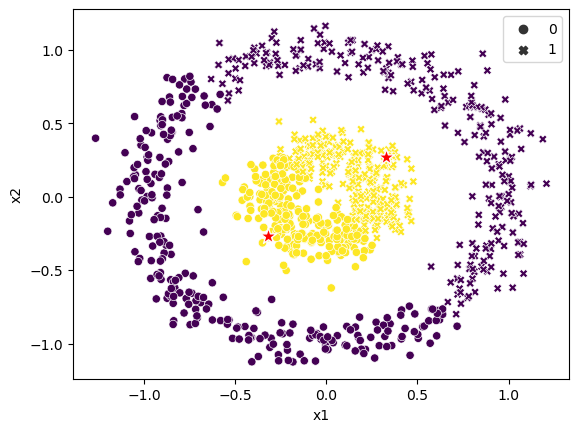

In [14]:
# Circle Dataset
apply_Euclidean_dist(circle_df)

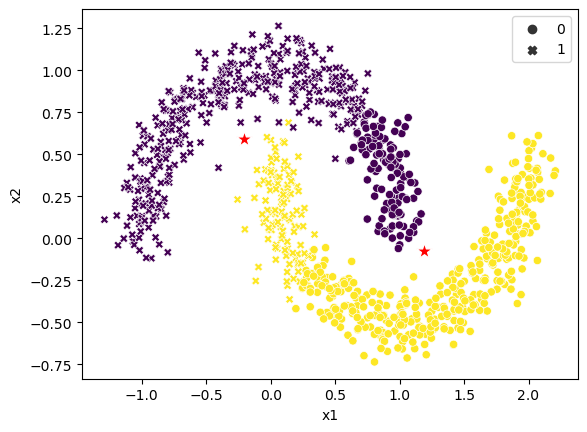

In [15]:
# Moon Dataset
apply_Euclidean_dist(moon_df)

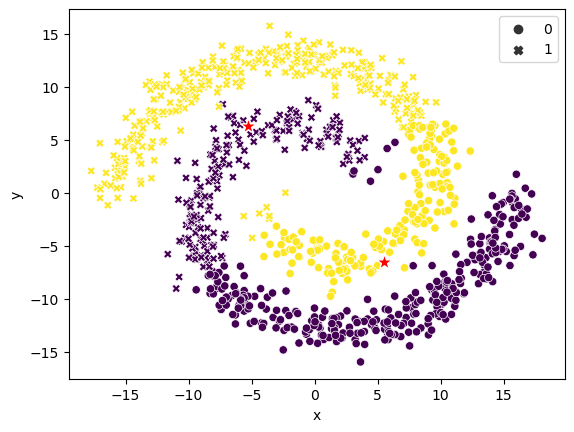

In [16]:
# Spiral Dataset
apply_Euclidean_dist(spiral_df)

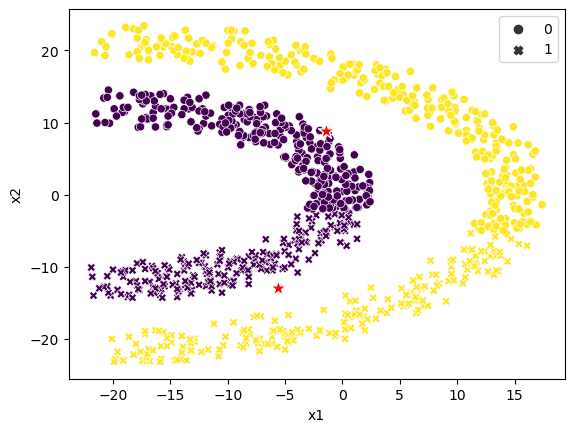

In [17]:
# Halfkernel Dataset
apply_Euclidean_dist(halfkernel_df)

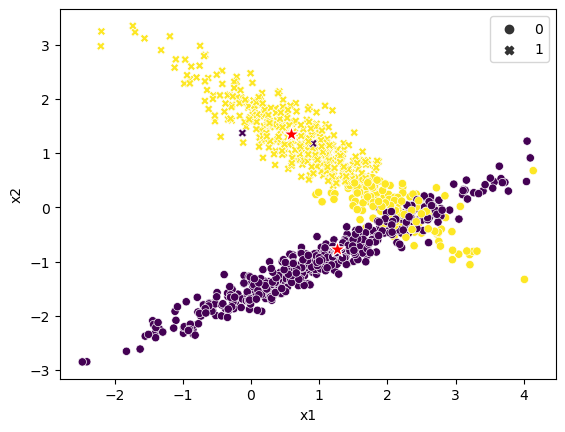

In [18]:
# Gaussian Dataset
apply_Euclidean_dist(gaussian_df)

### B. Mahalanobis Distance Function

In [19]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.linalg import inv
import scipy as stats

def apply_Mahalnobis_dist(df):    
    X = df.drop('label', axis='columns')
    Y_old = df['label']

    # Compute the Mahalanobis distance matrix
    inv_cov = inv(np.cov(X.T))
    D = cdist(X, X, metric='mahalanobis', VI=inv_cov)

    # Perform K-means clustering using the Mahalanobis distance
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
    kmeans.fit(D)

    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c=Y_old, style=kmeans.labels_, legend=True)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='r', s=150)

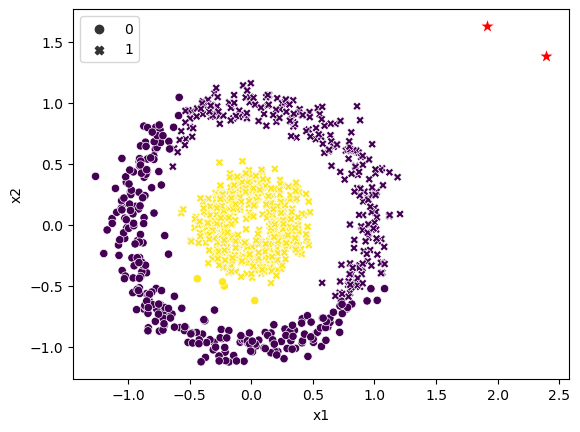

In [20]:
# Circle Datasets
apply_Mahalnobis_dist(circle_df)

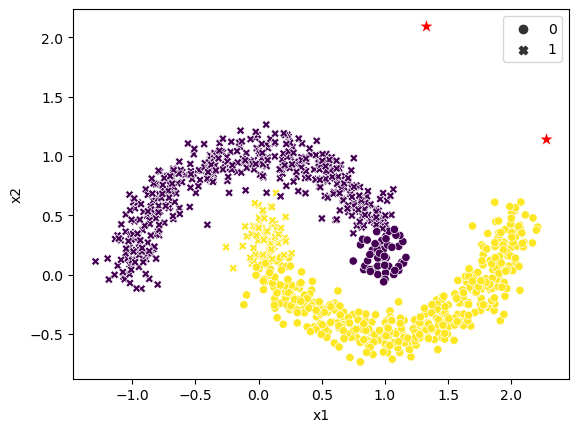

In [21]:
# Moon Datasets
apply_Mahalnobis_dist(moon_df)

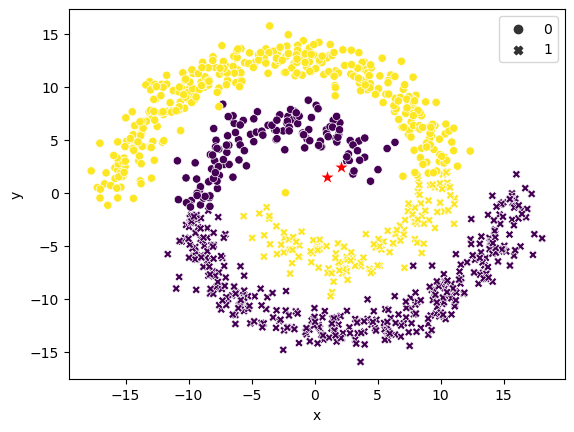

In [22]:
# Spiral Datasets
apply_Mahalnobis_dist(spiral_df)

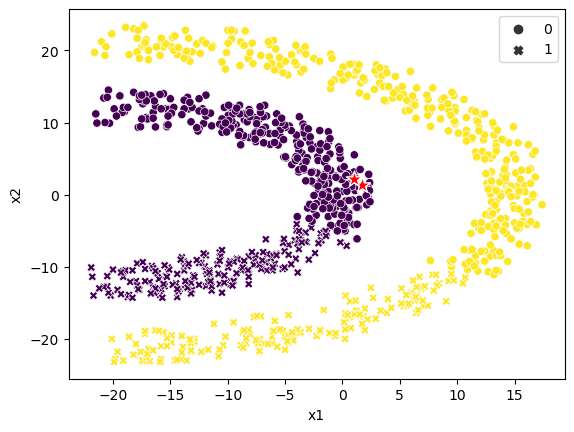

In [23]:
# Half Kernel Datasets
apply_Mahalnobis_dist(halfkernel_df)

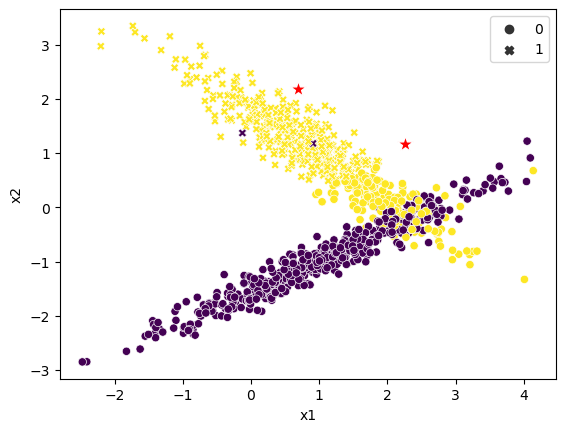

In [24]:
# Gaussian Datasets
apply_Mahalnobis_dist(gaussian_df)

### C. Cosine Distance

In [25]:
from sklearn.metrics.pairwise import cosine_distances

def apply_Cosine_dist(df):    
    X = df.drop('label', axis='columns')
    Y_old = df['label']
    
    #cosine distance
    distances = cosine_distances(X)

    # Perform K-means clustering using the Mahalanobis distance
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0)
    kmeans.fit(distances)

    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c=Y_old, style=kmeans.labels_, legend=True)
    sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', color='r', s=150)

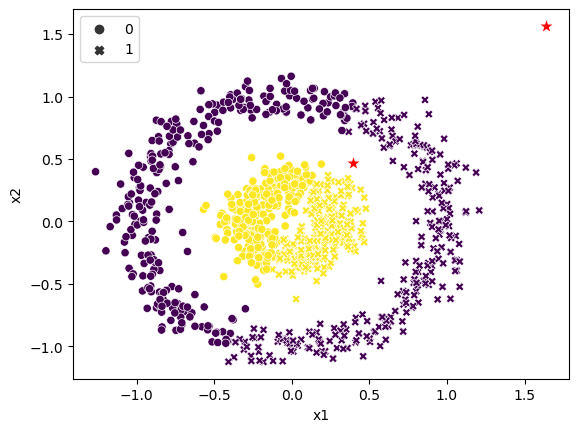

In [26]:
# Circle Datasets
apply_Cosine_dist(circle_df)

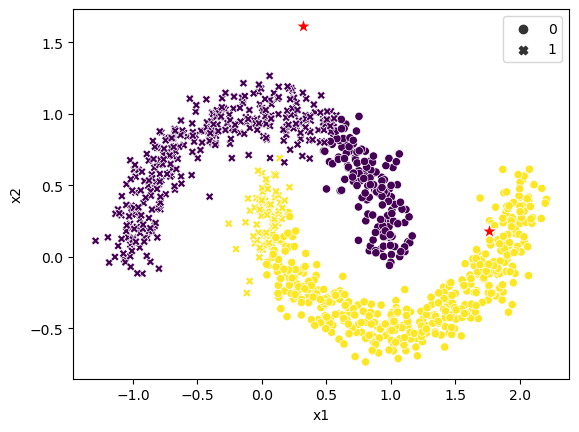

In [27]:
# Moon Dataset
apply_Cosine_dist(moon_df)

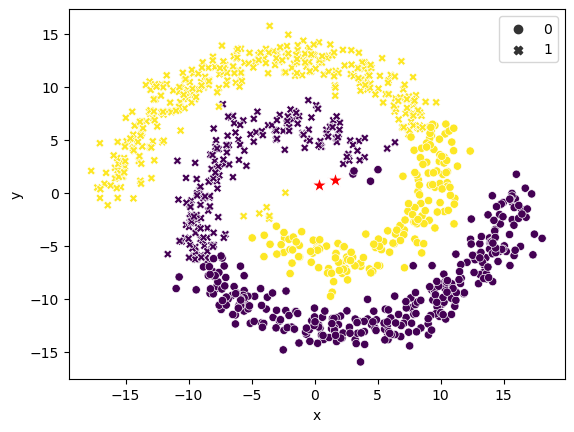

In [28]:
# SPiral Dataset
apply_Cosine_dist(spiral_df)

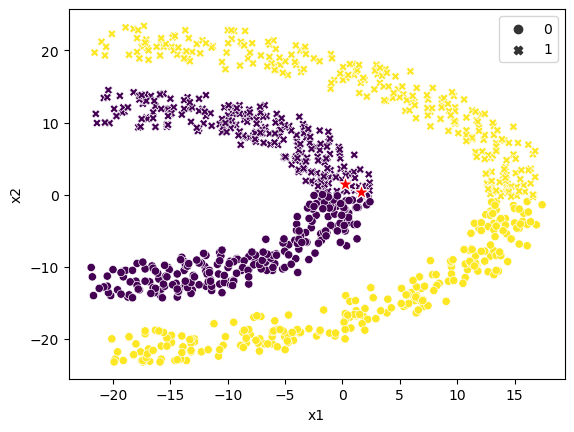

In [29]:
# Half Kernel Dataset
apply_Cosine_dist(halfkernel_df)

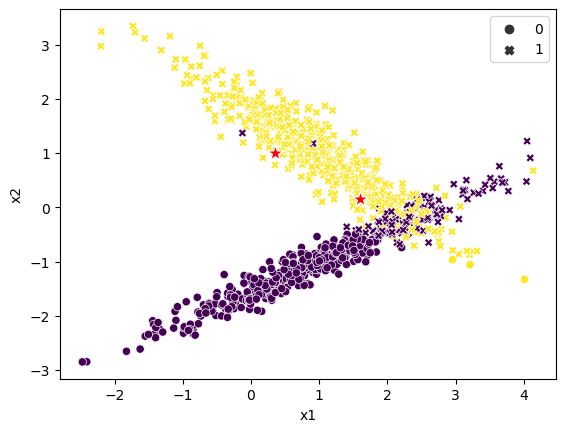

In [30]:
# Gaussian Dataset
apply_Cosine_dist(gaussian_df)

## Applying EM

In [31]:
def apply_em(df):    
    X=df.drop('label', axis='columns')
    Y=df['label']

    EM = GaussianMixture(n_components=2,covariance_type='full', random_state=0)
    y_pred = EM.fit_predict(X)

    X['new_label']=y_pred
    X['label']=Y

    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c=X['label'], style=X['new_label'], legend=True)

**I. circles0.3**

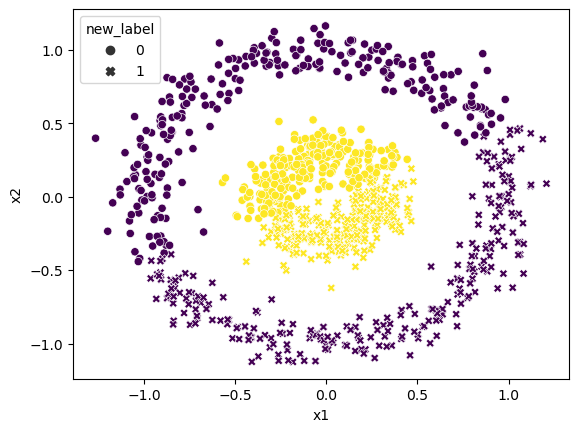

In [32]:
apply_em(circle_df)

**II. moons1**

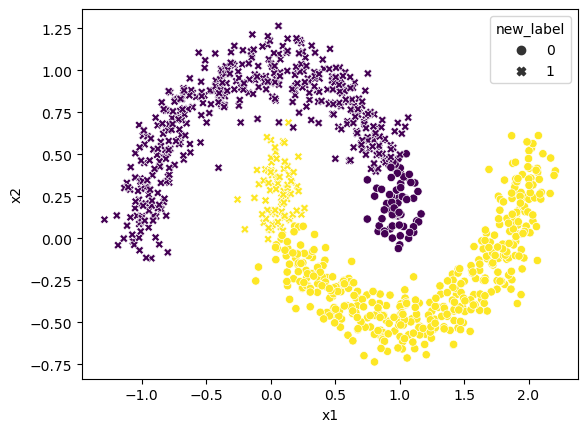

In [33]:
apply_em(moon_df)

**III. twogaussians42**

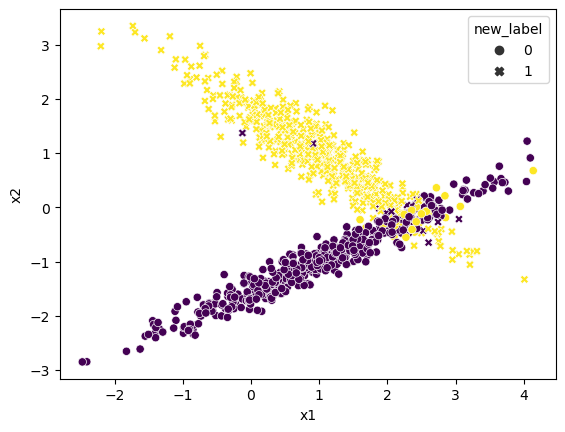

In [34]:
apply_em(gaussian_df)

**IV. halfkernel**

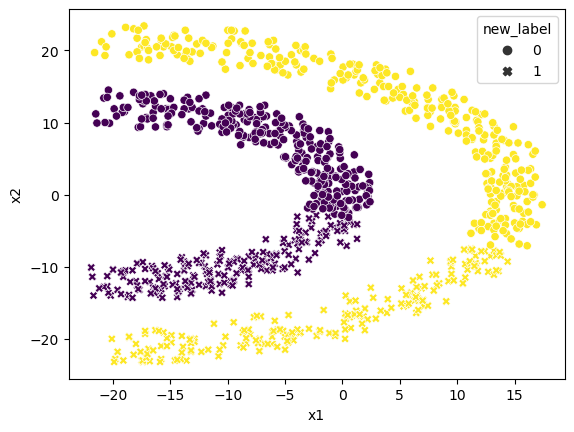

In [35]:
apply_em(halfkernel_df)

**V. spiral1**

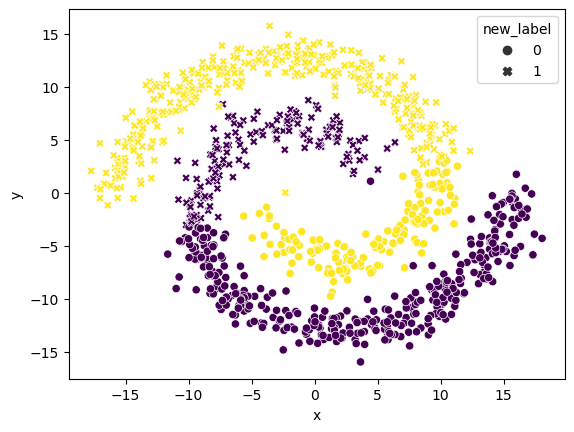

In [36]:
apply_em(spiral_df)

## Applying spectral clustering

In [37]:
def apply_sc(df,affinity,n_neighbors=10,gamma=1):    
    X=df.drop('label', axis='columns')
    Y=df['label']
    if(affinity=='rbf'):
        SC = SpectralClustering(affinity=affinity, n_clusters=2, gamma=gamma, random_state=0) 
    else:
        SC = SpectralClustering(affinity=affinity, n_clusters=2, n_neighbors=n_neighbors, 
                                random_state=0) 
        
    y_pred = SC.fit_predict(X)

    X['new_label']=y_pred
    X['label']=Y

    sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], c=X['label'], style=X['new_label'], legend=True)

**I. circles0.3**

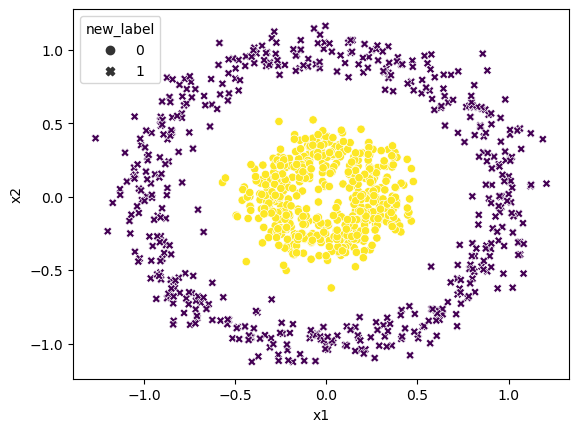

In [39]:
apply_sc(circle_df,affinity='rbf', gamma=15)

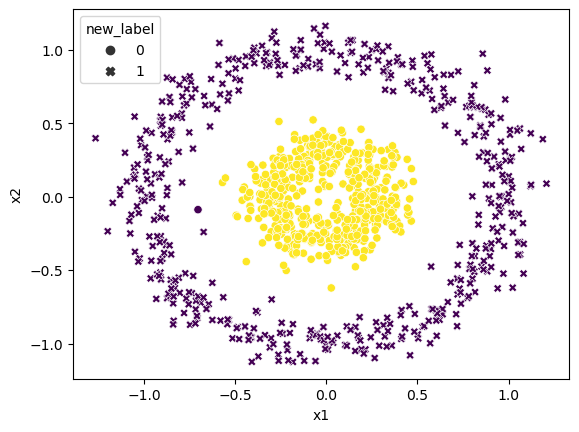

In [38]:
apply_sc(circle_df,affinity='nearest_neighbors', n_neighbors=15)

#### II. halfkernel

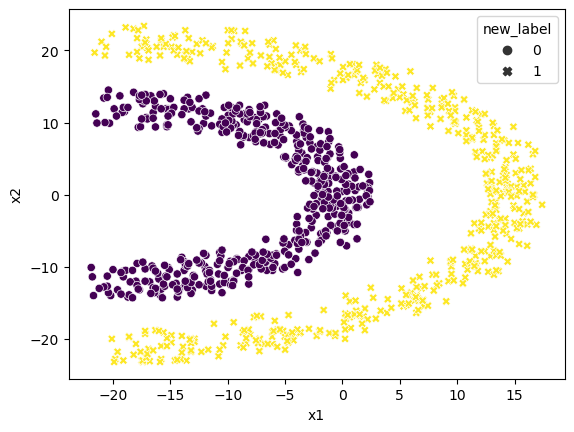

In [68]:
apply_sc(halfkernel_df,affinity='rbf', gamma=2)

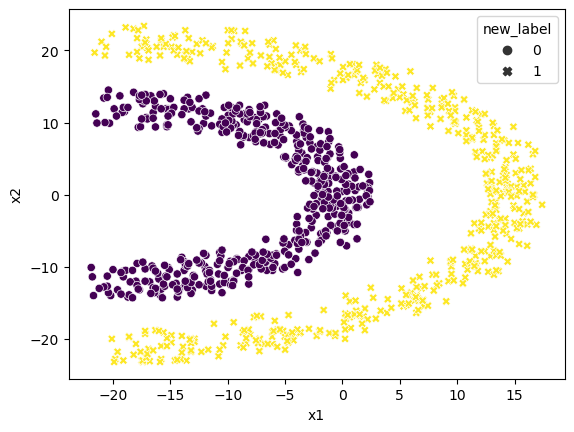

In [40]:
apply_sc(halfkernel_df,affinity='nearest_neighbors', n_neighbors=15)

#### III. moons1 

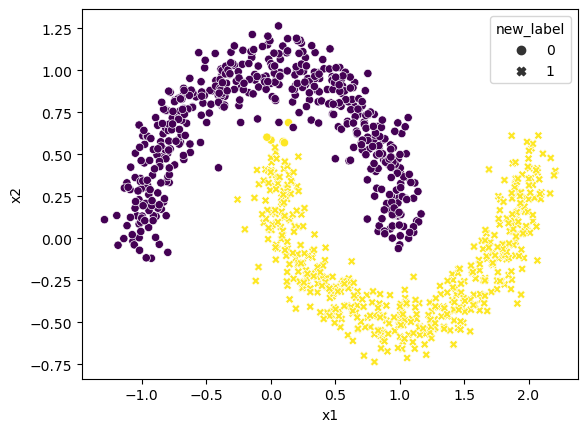

In [42]:
apply_sc(moon_df,affinity='rbf', gamma=25)

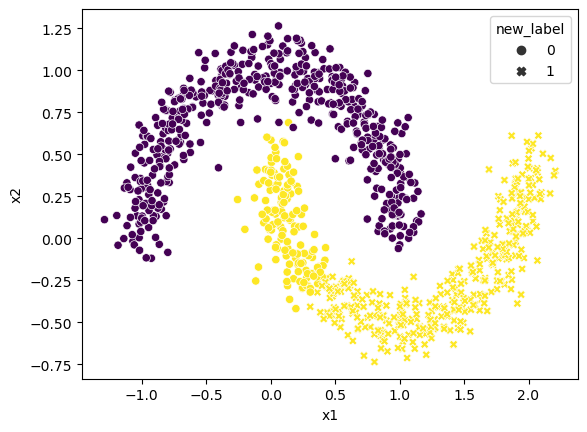

In [69]:
apply_sc(moon_df,affinity='nearest_neighbors', n_neighbors=15)

#### IV. spiral1

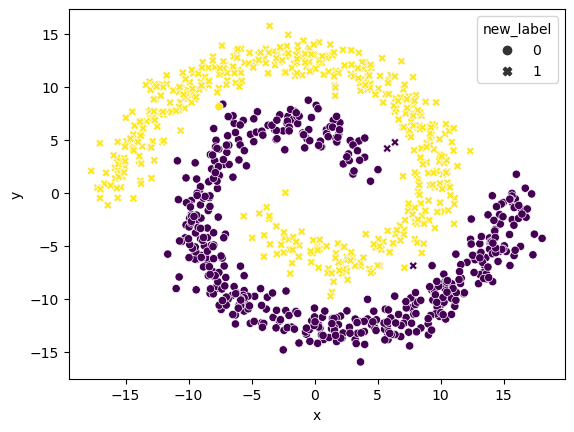

In [43]:
apply_sc(spiral_df,affinity='rbf', gamma=5)

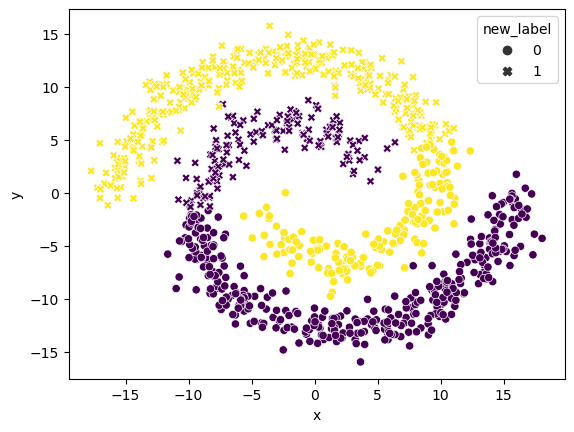

In [70]:
apply_sc(spiral_df,affinity='nearest_neighbors', n_neighbors=15)

#### V. twogaussians42

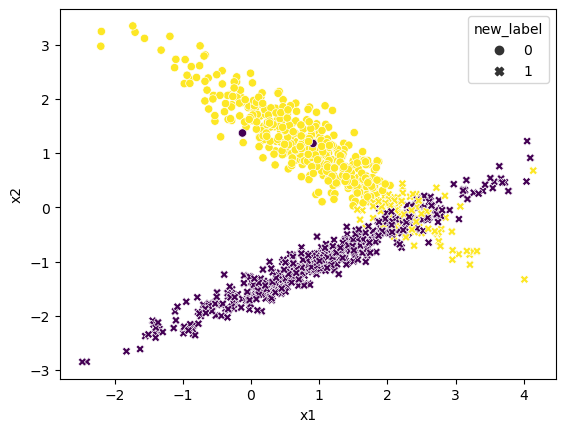

In [71]:
apply_sc(gaussian_df,affinity='rbf', gamma=10)

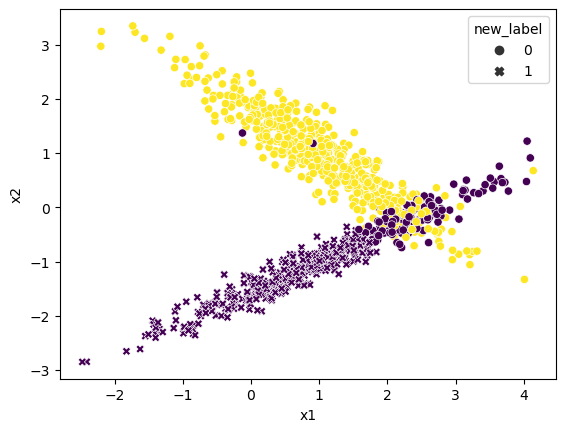

In [73]:
apply_sc(gaussian_df,affinity='nearest_neighbors', n_neighbors=15)

## Calculation of Number of K

### A. Elbow Method

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

def value_of_k_Elbow_Method(df):
    # Load the data
    data = df

    # Calculate WCSS for each K value from 1 to 10
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values against K values
    plt.plot(range(1, 10), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()


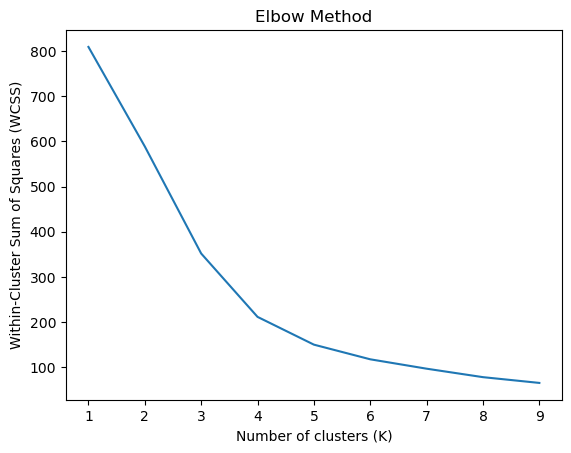

In [46]:
# Value of K for Circle Dataset using Elbow Method
value_of_k_Elbow_Method(circle_df)

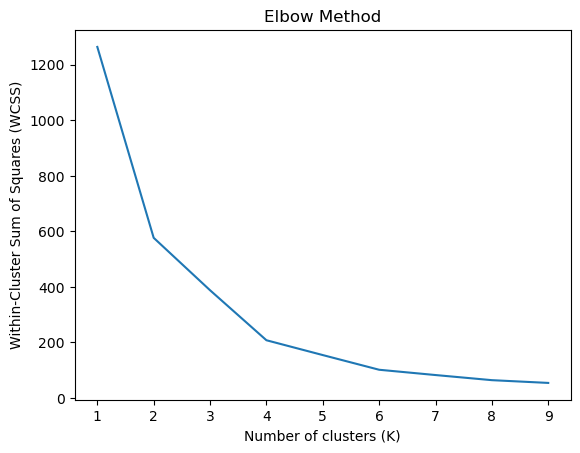

In [47]:
# Value of K for Moon Dataset using Elbow Method
value_of_k_Elbow_Method(moon_df)

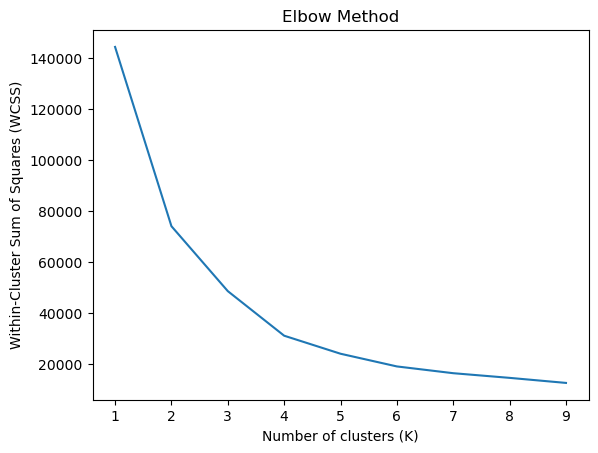

In [48]:
# Value of K for Spiral Dataset using Elbow Method
value_of_k_Elbow_Method(spiral_df)

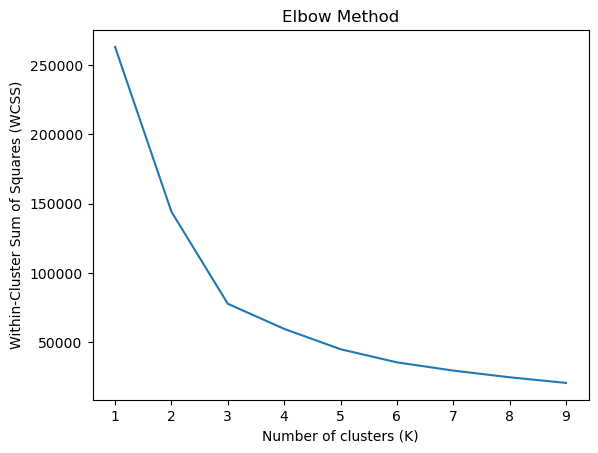

In [49]:
# Value of K for Halfkernel Dataset using Elbow Method
value_of_k_Elbow_Method(halfkernel_df)

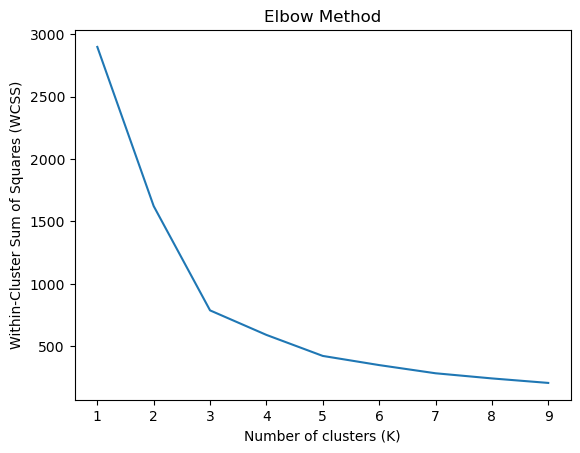

In [50]:
# Value of K for Gaussian Dataset using Elbow Method
value_of_k_Elbow_Method(gaussian_df)

### Silhouette Method


In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

def value_of_K_Silhouette_method(df):
    # Load the data
    data = df
    
    # Normalize the dataset
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Calculate Silhouette Score
    silhouette_scores = []

    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data_scaled)
        score = silhouette_score(data_scaled, kmeans.labels_)
        silhouette_scores.append(score)
        
    #Plotting the values
    plt.plot(range(2, 11), silhouette_scores)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    # value of K = highest silhouette score
    best_K = np.argmax(silhouette_scores) + 2
    print('Best value of K:', best_K)



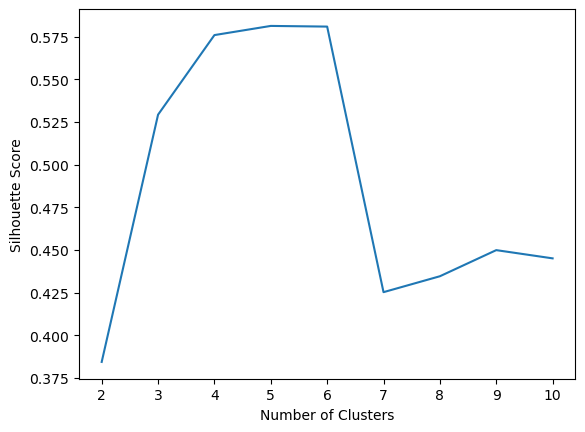

Best value of K: 5


In [52]:
# Value of K for Circle Dataset using Silhoutte Method
value_of_K_Silhouette_method(circle_df)

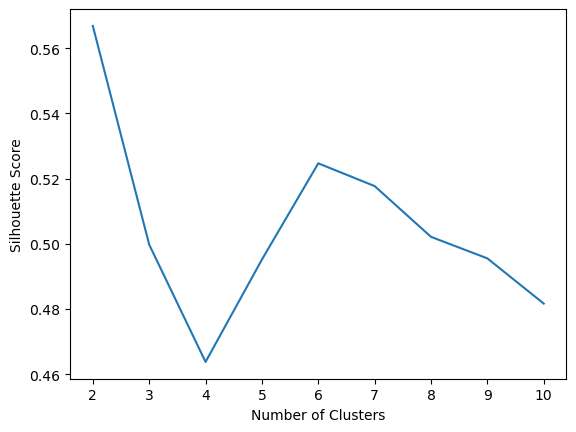

Best value of K: 2


In [53]:
# Value of K for Moon Dataset using Silhoutte Method
value_of_K_Silhouette_method(moon_df)

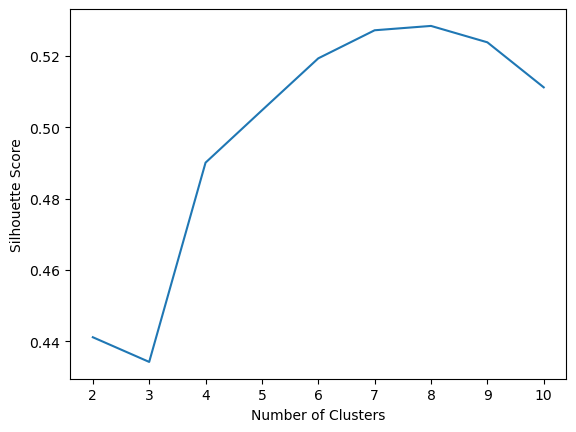

Best value of K: 8


In [54]:
# Value of K for Spiral Dataset using Silhoutte Method
value_of_K_Silhouette_method(spiral_df)

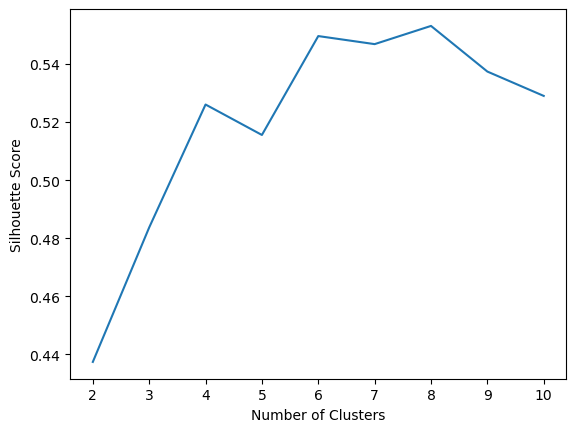

Best value of K: 8


In [55]:
# Value of K for Halfkernel Dataset using Silhoutte Method
value_of_K_Silhouette_method(halfkernel_df)

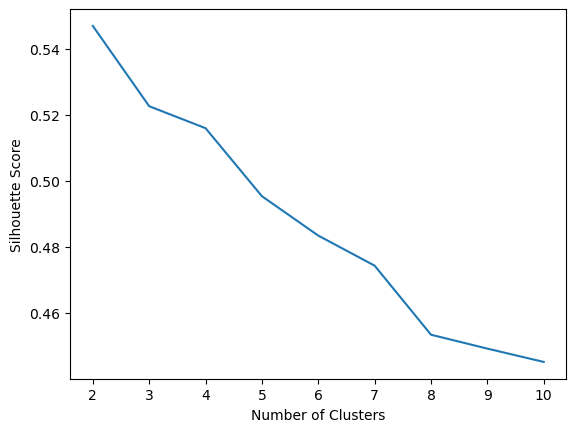

Best value of K: 2


In [56]:
# Value of K for Gaussian Dataset using Silhoutte Method
value_of_K_Silhouette_method(gaussian_df)